### Домашнее задание <a class="anchor" id="hw"></a><center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

8.326672684688674e-17 1.0


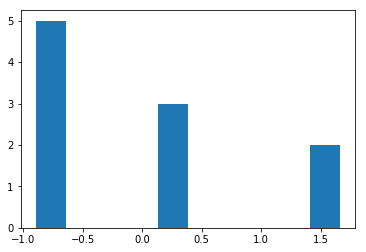

In [8]:
ind = 3
print(np.mean(X_st[:, ind]), np.std(X_st[:, ind]))
plt.hist(X_st[:, ind])
plt.show()

In [9]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

**1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод**

In [10]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
#     print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [11]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

array([56.21890547,  6.23067042, -0.16460375,  6.42090492])

In [10]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

10it [00:04,  2.30it/s]


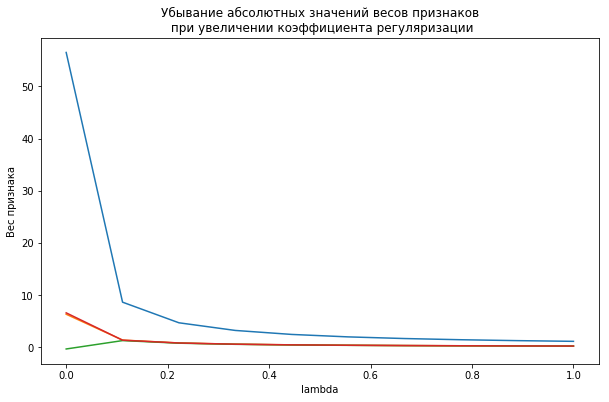

In [12]:
n = 10

coeffs = np.zeros((n, X_st.shape[1]))
lambda_list = np.linspace(0, 1, n)

for i, val in tqdm(enumerate(lambda_list)):
    weights = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=val)
    coeffs[i, :] = weights


plt.figure(figsize=(10, 6))
for i in range(X_st.shape[1]):
    plt.plot(lambda_list, coeffs[:, i])

    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

**2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

In [ ]:
W / np.abs(W)
+1 / 1 = +
-1 / 1 = -
0 / 0 = nan

In [40]:
np.sign(0)

0

In [13]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [19]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)

Iter: 0, weights: [0.07451502 0.65237289 0.52257318 0.69473631], error 3449.628240055913
Iter: 500, weights: [55.99770571  5.67419581  0.9872497   5.22459203], error 25.850323990519435
Iter: 1000, weights: [55.99999991  5.92961863  0.06493206  5.92453116], error 25.50788742255394
Iter: 1500, weights: [ 5.60000000e+01  5.91151692e+00 -1.14191837e-03  6.02940280e+00], error 25.4732951062374
Iter: 2000, weights: [5.60000000e+01 5.90717604e+00 1.32856412e-02 6.03301613e+00], error 25.46097496590052
Iter: 2500, weights: [5.60000000e+01 5.90684667e+00 6.57368115e-03 6.03317749e+00], error 25.46717475107214
Iter: 3000, weights: [5.60000000e+01 5.90707685e+00 1.46254767e-04 6.03346574e+00], error 25.47248615228035
Iter: 3500, weights: [5.60000000e+01 5.90693152e+00 1.32263134e-02 6.03330978e+00], error 25.46097651330158
Iter: 4000, weights: [5.60000000e+01 5.90688111e+00 6.39002278e-03 6.03324373e+00], error 25.467235006061355
Iter: 4500, weights: [ 5.60000000e+01  5.90714076e+00 -2.17264026e-

array([5.60000000e+01, 5.90709806e+00, 1.46703095e-02, 6.03349783e+00])

**3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

In [20]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [21]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [22]:
X_norm = X.copy().astype('float64')
X_norm = min_max_scale(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [23]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [24]:
X_norm_st = standard_scale(X_norm)
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [25]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

**4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.**

In [26]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
         0.77271648, -0.5294093 ],
       [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
         0.65967443, -0.5364636 ],
       [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
         1.29076796, -0.34530826],
       ...,
       [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
        -0.59041036, -0.6747931 ],
       [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
         0.02393901,  1.37086726],
       [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
        -0.26133944,  0.50888458]])

array([-133.10543687,   44.01778172,   48.98233093, ..., -271.14963388,
        161.66813826,  380.05918834])

array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
       9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
       3.71965212e+01, 6.59198012e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78539772e+01, 0.00000000e+00, 7.36381949e+01])

In [27]:
X = standard_scale(X)

In [28]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, Y, iterations, eta=1e-4, size=1):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [29]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [30]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 28293.52691456705
Iter: 500, error 3781.8327161686843
Iter: 1000, error 524.6905200887845
Iter: 1500, error 91.56594033620323
Iter: 2000, error 33.92870227543529
Iter: 2500, error 26.25316099268951
Iter: 3000, error 25.23026499113571
Iter: 3500, error 25.093847058551862
Iter: 4000, error 25.07564042520762
Iter: 4500, error 25.073208744745163
Final MSE: 25.072883730568243
CPU times: user 3min 48s, sys: 1min 27s, total: 5min 15s
Wall time: 2min 7s


In [31]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 28233.622265430018
Iter: 500, error 3363.730252464468
Iter: 1000, error 470.48057916534816
Iter: 1500, error 87.10699508274061
Iter: 2000, error 36.405329223944356
Iter: 2500, error 26.460035206170456
Iter: 3000, error 25.476717452656935
Iter: 3500, error 25.949583050610443
Iter: 4000, error 25.779150961472588
Iter: 4500, error 25.540406377913055
Final MSE: 25.353754138698704
CPU times: user 39.5 s, sys: 15 s, total: 54.5 s
Wall time: 17.7 s


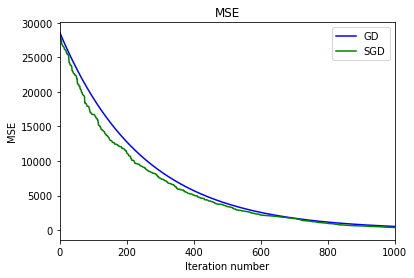

In [41]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [27]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

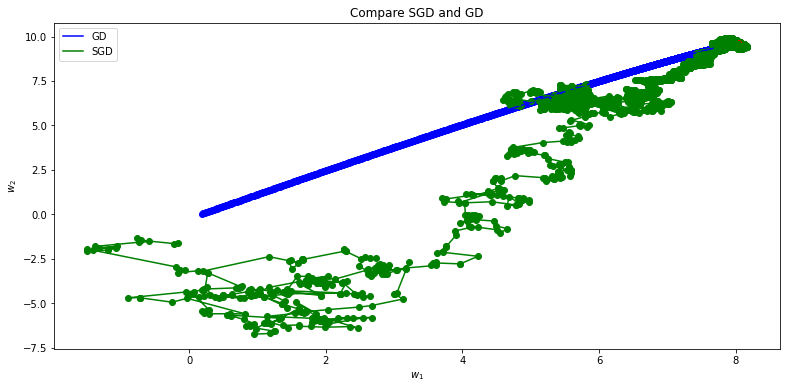

In [28]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()